Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


Load Dataset

In [47]:
import pandas as pd
df = pd.read_csv("music_genre_predicted.csv")
df['genre'] = df['genre'].astype(int)

print("DataFrame loaded successfully with predicted genres.", df.head())

DataFrame loaded successfully with predicted genres.         Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.7

Separate Features (X) and Target (y)

In [48]:
X = df.drop('genre', axis=1)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 12)
Shape of y: (1000,)


Encode Labels

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Shape of y_encoded:", y_encoded.shape)

Shape of y_encoded: (1000,)


Scale Data

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X_scaled:", X_scaled.shape)

Shape of X_scaled: (1000, 12)


Apply PCA (95% Variance)

In [51]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Shape of X_pca:", X_pca.shape)

Shape of X_pca: (1000, 10)


Train / Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42
)

Train Logistic Regression

In [53]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

Evaluate the Model

In [54]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.97      0.97      0.97        36
           2       0.97      0.97      0.97        38
           3       0.93      0.97      0.95        29
           4       0.95      0.93      0.94        42

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

[[54  0  0  0  1]
 [ 0 35  1  0  0]
 [ 0  1 37  0  0]
 [ 0  0  0 28  1]
 [ 1  0  0  2 39]]


Predict Genres for Unlabeled Rows

In [55]:
original_df = pd.read_csv("/content/music_dataset_mod.csv")
unlabeled = original_df.drop(columns=["Genre"]).dropna()
unlabeled_scaled = scaler.transform(unlabeled)
unlabeled_pca = pca.transform(unlabeled_scaled)

unlabeled['predicted_genre'] = le.inverse_transform(model.predict(unlabeled_pca))
display(unlabeled.head())

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,predicted_genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,4
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,1
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,0
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


Visualize PCA Components

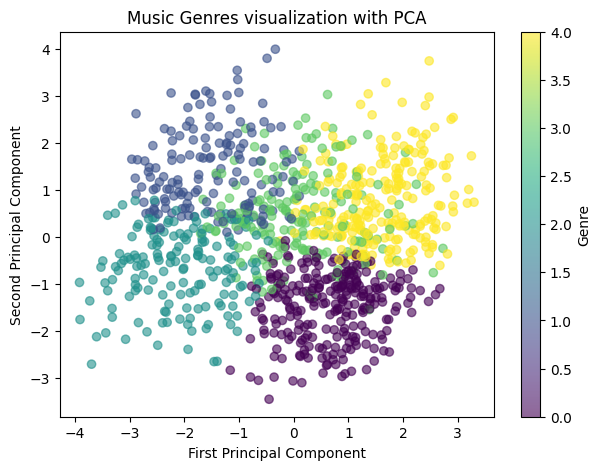

In [56]:
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Music Genres visualization with PCA')
plt.colorbar(label='Genre')
plt.show()